<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/50_start_ups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [ ]:
# load data and read from it
file = '/content/50_Startups.csv'
df = pd.read_csv(file)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [ ]:
# info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# statistical info
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [ ]:
# encode categorical data state
# df = pd.get_dummies(df, columns=['State'])

df['State'] = LabelEncoder().fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Linear Regression

In [ ]:
# identify features and targets
X = df.drop('Profit', axis=1)
y = df['Profit']

In [ ]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# train the model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make predictions
y_lin_pred = lin_model.predict(X_test)

In [ ]:
# check bias amd weights
lin_bias = lin_model.intercept_
lin_weights = lin_model.coef_

print(f'Bias: {lin_bias}')
print(f'Weights: {lin_weights}')

Bias: 56534.958889836904
Weights: [ 8.09559857e-01 -8.94928622e-02  3.06256651e-02 -1.80471955e+02]


In [ ]:
# evaluate model perforance
lin_mse = mean_squared_error(y_test, y_lin_pred)
lin_mae = mean_absolute_error(y_test, y_lin_pred)
lin_r2 = r2_score(y_test, y_lin_pred)
lin_accuracy = lin_model.score(X_test, y_test)


print(f'Mean Squared Error: {lin_mse:.2f}')
print(f'Mean Absolute Error: {lin_mae:.2f}')
print(f'R-squared: {lin_r2:.2f}')
print(f'Accuracy: {lin_accuracy:.2f}')

Mean Squared Error: 86953191.30
Mean Absolute Error: 7455.85
R-squared: 0.92
Accuracy: 0.92


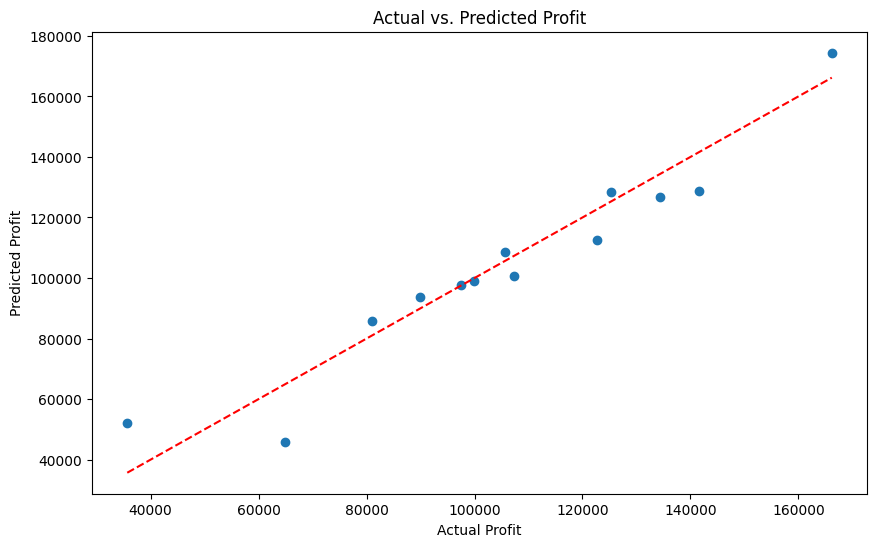

In [ ]:
# plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lin_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.show()

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Polynomial Regression

In [ ]:
# define polynomial features
X_1 = df['R&D Spend'].values.reshape(-1, 1)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_1, y, test_size=0.25, random_state=42)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.transform(X_test_p)

In [ ]:
# build linear regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_p)

LinearRegression()

In [ ]:
# make predictions
y_poly_pred = poly_model.predict(X_test_poly)

In [ ]:
# evaluate performance metrics
poly_mse = mean_squared_error(y_test_p, y_poly_pred)
poly_mae = mean_absolute_error(y_test_p, y_poly_pred)
poly_r2 = r2_score(y_test_p, y_poly_pred)
poly_accuracy = poly_model.score(X_test_poly, y_test_p)

print(f'Mean Squared Error: {poly_mse:.2f}')
print(f'Mean Absolute Error: {poly_mae:.2f}')
print(f'R-squared: {poly_r2:.2f}')

Mean Squared Error: 59340472.55
Mean Absolute Error: 6120.18
R-squared: 0.94


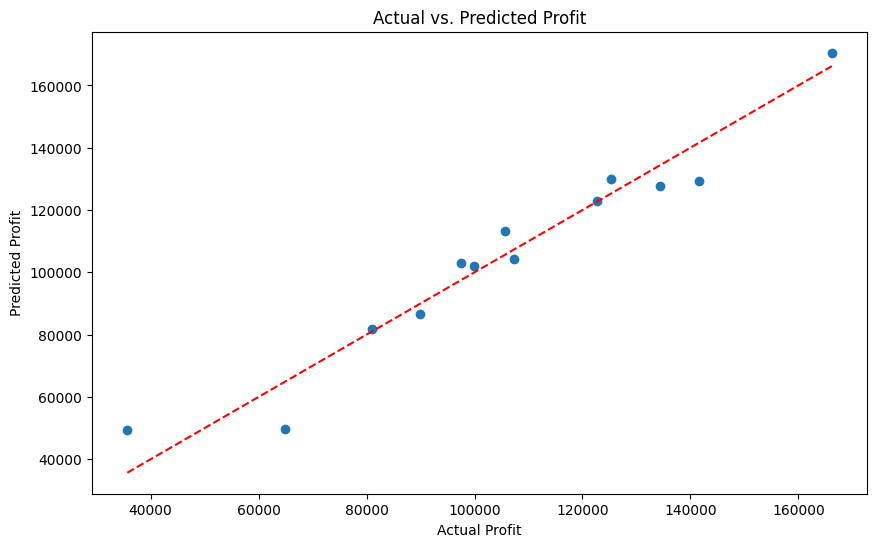

In [ ]:
# plot
x = poly_model.predict(poly.transform(X_1))
plt.figure(figsize=(10, 6))
plt.scatter(y_test_p, y_poly_pred)
plt.plot([min(y_test_p), max(y_test_p)], [min(y_test_p), max(y_test_p)], color='red', linestyle='--')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.show()